In [1]:
%matplotlib inline

import numpy as np
import scipy as sp

epsilon = 0.001
domain = np.arange(-np.pi/2.0, np.pi/2.0, epsilon)

print type(domain)
bins = domain.shape[0]
scale = float(bins)
blueRange = np.zeros(bins)
redRange = np.zeros(bins)

print redRange.shape

# print domain.ndim

Populating the interactive namespace from numpy and matplotlib
<type 'numpy.ndarray'>
(3142L,)


In [2]:
def index(wavelength):
    if (wavelength < 400.0): return
    if (wavelength > 700.0): return
    ind400 = 1.339
    ind700 = 1.331
    deltaind = ind700 - ind400
    deltawavefraction = (wavelength - 400.0)/300.0
    return (deltaind * deltawavefraction) + ind400


In [3]:
def dropangle(y, wavelength):
    if (y < 0.0):
        return
    elif (y > 1.0): 
        return
    indWater = index(wavelength)
    indAir = 1.00029
    theta1 = np.arcsin(y)
    theta2 = np.arcsin(np.sin(theta1)*(indAir/indWater))
    return 4.0*theta2-2.0*theta1


In [4]:
def getbin(theta):
    if (theta < -np.pi/2.0): return
    if (theta > np.pi/2.0): return
    
    bin = int((theta+np.pi/2.0)*(scale/np.pi))
    if (bin >= 0 and bin < bins):
        return bin
    

(30.0, 45.0)

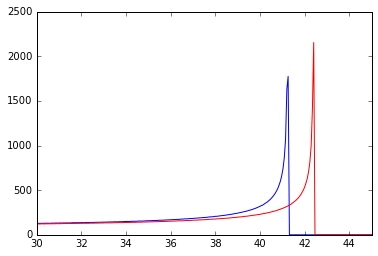

In [5]:
for y in np.arange(0.0,1.0, 0.00001):
    thetaRed = dropangle(y, 700.0)
    thetaBlue = dropangle(y, 400.0)
    redBin = getbin(thetaRed)
    blueBin = getbin(thetaBlue)
    if blueBin >= 0 and blueBin < bins: blueRange[blueBin] += 1.0
    if redBin >= 0 and redBin < bins: redRange[redBin] += 1.0
  
# print type(domain)
# print type(histogram)

# plt.plot(domain, histogram)

domainDegrees = domain * 180.0 / np.pi

plt.plot(domainDegrees, blueRange, 'b')
plt.plot(domainDegrees, redRange, 'r')

plt.xlim([30.0, 45.0])


In [6]:

maxRedIndex = np.where(redRange == redRange.max())[0][0]
maxBlueIndex = np.where(blueRange == blueRange.max())[0][0]
redMaxAngleDegrees = domain[maxRedIndex]*180.0/np.pi
blueMaxAngleDegrees = domain[maxBlueIndex]*180.0/np.pi
print 'red:', redRange.max(),', index', maxRedIndex, '     angle:', redMaxAngleDegrees
print 'blue:', blueRange.max(),', index', maxBlueIndex, '     angle:', blueMaxAngleDegrees
print 'Wikipedia rainbow is 42.00 - 40.89 =', 42.00 - 40.89, 'degrees wide'
print 'This rainbow is', redMaxAngleDegrees - blueMaxAngleDegrees, 'degrees wide'

# 40.89 to 42 (red) is 1.11 degrees (Wikipedia article on rainbows)
# My rainbow is 1.146 degrees wide


red: 2153.0 , index 2311      angle: 42.4105464547
blue: 1774.0 , index 2291      angle: 41.2646308645
Wikipedia rainbow is 42.00 - 40.89 = 1.11 degrees wide
This rainbow is 1.14591559026 degrees wide


In [ ]:
# Path 1 is along the edges... very long!
p1 = 3 + 0.5
print p1


In [ ]:
# path 2 is two diagonals: across the 1-dot face and across the 2-dot face
p2 = np.sqrt(2) + np.sqrt(5)/2.0
print p2


In [ ]:
# path 3 is a long diagonal across face 1-dot, 3-dot and 2-dot
p3 = 5.0 / 2.0
print p3

In [ ]:
# path 4 is another diagonal that goes across face 1-dot and face 2-dot (but the other version of face 2-dot)
p4 = np.sqrt(17.0)/2.0
print p4
print p3

(-2, 2)

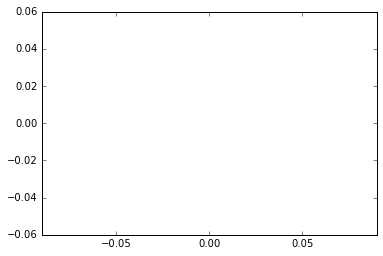

In [10]:
# deprecated combination of stateful and object interfaces
import matplotlib.pyplot as plt

circle1=plt.Circle((0,0), 1.0, color='k', fill=False)
# circle2=plt.Circle((.5,.5),.2,color='b')
# circle3=plt.Circle((1,1),.2,color='g',clip_on=False)

fig = plt.figure()
fig.gca().add_artist(circle1)
plt.axis('equal') # Hah! The aspect ratio is ok
plt.xlim(-2, 2)

# Intellisense-ish: plt. and then press tab...
# np.linspace() and inside the parens shift-tab to see the arg list; and shift-tab twice for extended summary
# and shift-tab four times to pop that out. 
# plt is a stateful interface: current figure, axis and so on; so plt.X can change state
# Try plt.plot?? getting the source code...
# Try plt.plot? getting the documentation
# gca means get current axis
# fig.gca().add_artist(circle2)
# fig.gca().add_artist(circle3)
# fig.savefig('plotcircles.png')

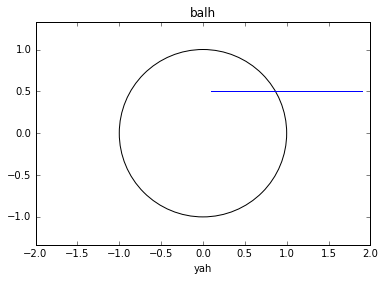

In [20]:
# let's do this the object way
%matplotlib inline
fig, ax = plt.subplots()

# now we say that 'fig' is the overall canvas
# ax is the (list of) axes
# after this we leave fig alone and just use ax

# figure contains a bunch of axes (subplots(7)) and axis contains a bunch of artists

# a patch is a filled shape
# from matplotlib import patches
# patches.<tab> shows you them
ax.add_patch(plt.Circle((0, 0), 1, color = 'k', fill=False))

ax.axis('equal')
ax.set_xlim(-7, 7)

# add this...
ax.set_ylim(-6, 6)

ax.set(xlim=(-2, 2), ylim=(-3,3))
ax.set(xlabel='yah', title='balh')

x1 = 1.9
x2 = 0.1
y1 = 0.5
y2 = 0.5

ax.plot([x1, x2], [y1, y2])

# python data science handbook (o'reilly)
